# Advanced Dataframe Examples

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

np.random.seed(123)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# randomly generate scores for each student for each subject
# note that all the values need to have the same length here
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades,
                   'classroom': np.random.choice(['A', 'B'], len(students))})

In [2]:
df

,name,math,english,reading,classroom
0,Sally,62,85,80,A
1,Jane,88,79,67,B
2,Suzie,94,74,95,A
3,Billy,98,96,88,B
4,Ada,77,92,98,A
5,John,79,76,93,B
6,Thomas,82,64,81,A
7,Marie,93,63,90,A
8,Albert,92,62,87,A
9,Richard,69,80,94,A


In [3]:
db_name = "employees"

In [4]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [5]:
df = pd.read_sql("SELECT * FROM employees LIMIT 5",url)

In [6]:
df

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [7]:
sql = '''
SELECT
    emp_no,
    first_name,
    last_name
FROM employees
WHERE gender = 'F'
LIMIT 5
OFFSET 200
'''

pd.read_sql(sql, url)

,emp_no,first_name,last_name
0,10513,Yuichiro,Schicker
1,10519,Yonghoan,Alencar
2,10522,Marke,Cesareni
3,10524,Shigehiro,Cincotta
4,10526,Kwangho,Theuretzbacher


In [8]:
query = '''
SELECT
    t.title as title,
    d.dept_name as dept_name
FROM titles t
JOIN dept_emp USING (emp_no)
JOIN departments d USING (dept_no)
'''

employees = pd.read_sql(query, url)

In [9]:
employees

,title,dept_name
0,Staff,Customer Service
1,Senior Staff,Customer Service
2,Staff,Customer Service
3,Senior Staff,Customer Service
4,Staff,Customer Service
...,...,...
489898,Senior Staff,Sales
489899,Staff,Sales
489900,Staff,Sales
489901,Senior Staff,Sales


## Getting data from SQL databases

#### Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [10]:
empdf = pd.read_sql("SELECT * FROM employees LIMIT 5",url)

In [11]:
empdf

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [12]:
titlesdf = pd.read_sql("SELECT * FROM titles LIMIT 100",url)

In [13]:
titlesdf

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
95,10063,Senior Engineer,1989-04-08,9999-01-01
96,10064,Staff,1985-11-20,1992-03-02
97,10065,Engineer,1998-05-24,9999-01-01
98,10066,Assistant Engineer,1986-02-26,1992-02-26


In [14]:
titlesdf.groupby("title").emp_no.value_counts()

title               emp_no
Assistant Engineer  10008     1
                    10009     1
                    10024     1
                    10066     1
Engineer            10004     1
                             ..
Staff               10064     1
Technique Leader    10021     1
                    10025     1
                    10033     1
                    10044     1
Name: emp_no, Length: 100, dtype: int64

In [15]:
questions = '''
SELECT 
    CONCAT(first_name," ",last_name) as full_name,
    emp_no
    title, 
    from_date, 
    to_date 
FROM titles 
JOIN employees USING (emp_no)
ORDER BY full_name
LIMIT 50
'''

titles_and_names = pd.read_sql(questions, url)

In [16]:
titles_and_names = pd.read_sql("SELECT * FROM titles JOIN employees USING (emp_no)", url)

In [17]:
titles_and_names['full_name'] = titles_and_names.first_name + " " + titles_and_names.last_name

In [18]:
titles_and_names

,emp_no,title,from_date,to_date,birth_date,first_name,last_name,gender,hire_date,full_name
0,10001,Senior Engineer,1986-06-26,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26,Georgi Facello
1,10002,Staff,1996-08-03,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21,Bezalel Simmel
2,10003,Senior Engineer,1995-12-03,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28,Parto Bamford
3,10004,Engineer,1986-12-01,1995-12-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,Chirstian Koblick
4,10004,Senior Engineer,1995-12-01,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,Chirstian Koblick
...,...,...,...,...,...,...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29,1961-08-03,Berhard,Lenart,M,1986-04-21,Berhard Lenart
443304,499997,Senior Engineer,1992-08-29,9999-01-01,1961-08-03,Berhard,Lenart,M,1986-04-21,Berhard Lenart
443305,499998,Senior Staff,1998-12-27,9999-01-01,1956-09-05,Patricia,Breugel,M,1993-10-13,Patricia Breugel
443306,499998,Staff,1993-12-27,1998-12-27,1956-09-05,Patricia,Breugel,M,1993-10-13,Patricia Breugel


In [19]:
number_of_employees_per_title = titles_and_names.title.count()

In [55]:
number_of_employees_per_title_ever = titles_and_names.groupby("full_name")[['title']].count()

In [89]:
number_of_employees_per_title_ever.loc["full_name":"Laurentiu Cesareni"]

,title
full_name,


In [62]:
number_of_employees_per_title_ever.nunique()

title    8
dtype: int64

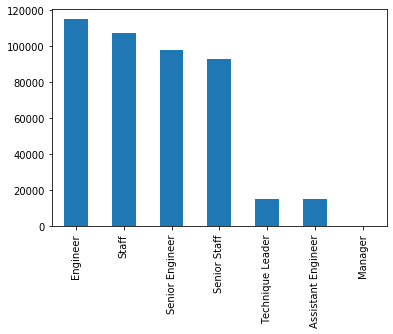

In [22]:
number_of_employees_per_title_ever.plot.bar()

In [69]:
number_of_employees_per_title = titles_and_names.groupby('full_name').title.count()

In [86]:
number_of_employees_per_title.sort_values()

full_name
Aamer Anger                1
Kankanahalli Lyonns        1
Shunichi Bazzichi          1
Kankanahalli Maierhofer    1
Shunichi Bahl              1
                          ..
Hisao Iisaka               7
Alper Lienhardt            7
Pranas Matzen              7
Yonghong Codenie           8
Laurentiu Cesareni         8
Name: title, Length: 279408, dtype: int64

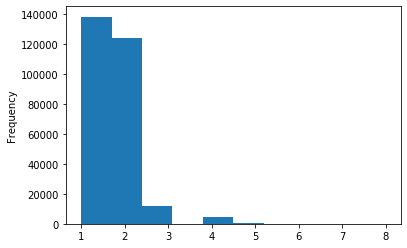

In [71]:
number_of_employees_per_title.plot.hist()